In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import datetime

%matplotlib inline

In [10]:
os.chdir(r'../course-files')
marathon = pd.read_csv("./marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon.head()

,Age,M/F,Country,40K
0,24,M,KEN,2:02:53
1,30,M,USA,2:03:14
2,25,M,JPN,2:03:38
3,32,M,USA,2:04:35
4,31,M,KEN,2:05:00


In [31]:
# marathon['40K'] = marathon['40K'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))
marathon["TimeSeconds"] = marathon["40K"][marathon['40K'] != '-'].apply(lambda x: pd.Timedelta(x).total_seconds())
groupMF = marathon[ marathon["Country"].isin(["USA","CAN"]) ].groupby(by=["Country","M/F"])
groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
groupMF = groupMF.unstack()
groupMF.columns = groupMF.columns.droplevel().droplevel()
groupMF

M/F,F,M
Country,,
CAN,13618.346012,12527.160190
USA,14188.759649,13004.157656


<Axes: xlabel='Country'>

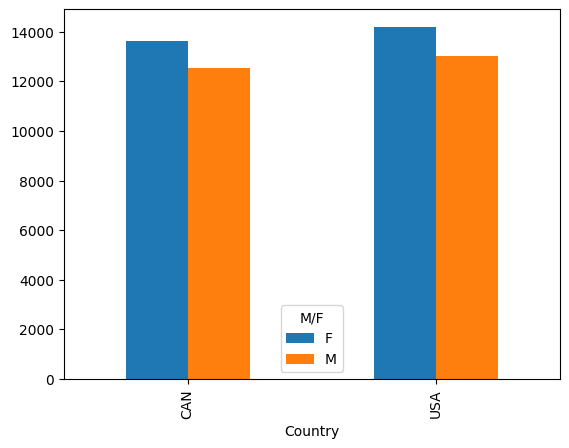

In [32]:
groupMF.plot(kind='bar')

<Axes: xlabel='Country'>

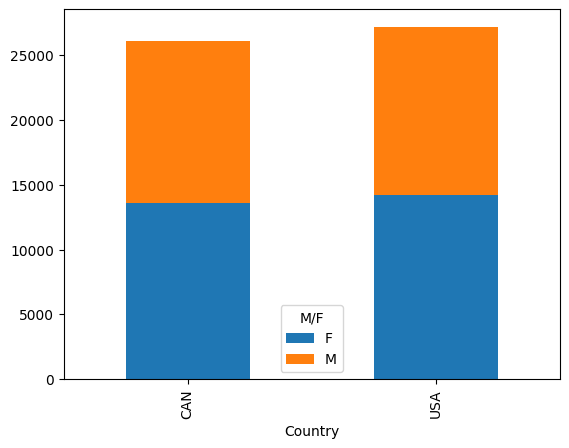

In [34]:
groupMF.plot(kind='bar', stacked=True)

<Axes: ylabel='Country'>

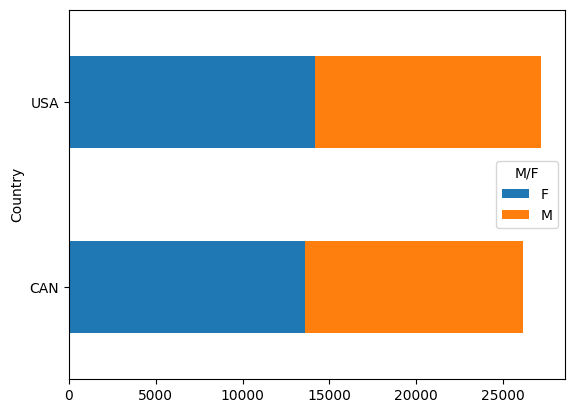

In [35]:
groupMF.plot(kind='barh', stacked=True)

In [36]:
age_data = marathon[ marathon["Country"].isin(["USA"]) ]
age_data.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<Axes: ylabel='Frequency'>

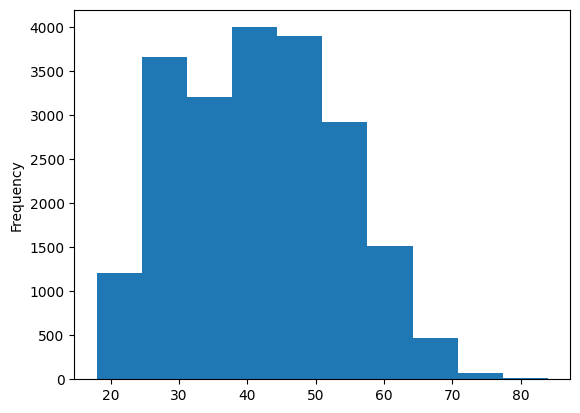

In [38]:
age_data.Age.plot(kind='hist')

In [39]:
age_data.Age.nunique()

66

<Axes: ylabel='Frequency'>

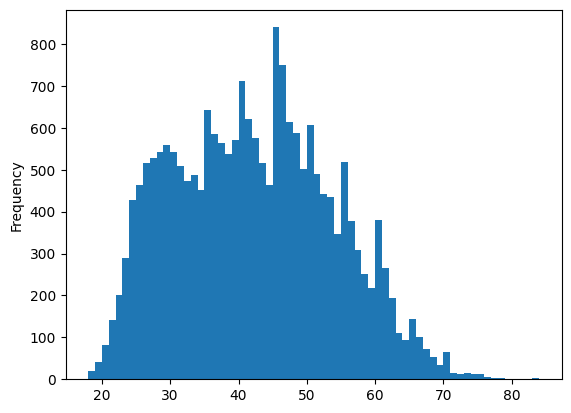

In [40]:
age_data.Age.plot(kind='hist', bins=age_data.Age.nunique())

In [41]:
data_USA = marathon[ marathon["Country"].isin(["USA"]) ]
data_USA.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<Axes: >

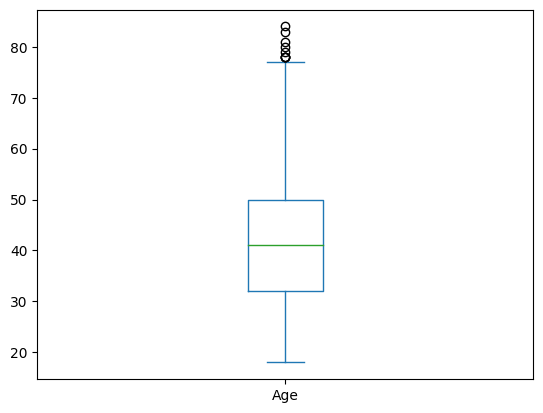

In [42]:
data_USA.Age.plot(kind='box')

In [43]:
USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
df = pd.DataFrame({'USA':USA, 'CAN':CAN})
df.head()

,USA,CAN
1,30.0,NaN
3,32.0,NaN
5,40.0,NaN
6,33.0,NaN
8,27.0,NaN


<Axes: >

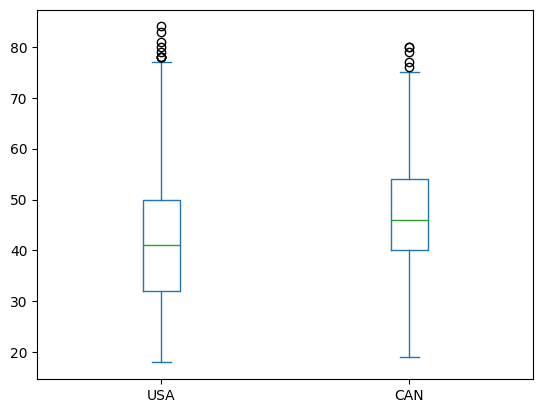

In [44]:
df.plot(kind='box')